<hr style="height:2px;">

# Demo: Apply trained CARE model for denoising of *Tribolium castaneum*

This notebook demonstrates applying a CARE model for a 3D denoising task, assuming that training was already completed via [2_training.ipynb](2_training.ipynb).  
The trained model is assumed to be located in the folder `models` with the name `my_model`.

More Documentation is available at http://csbdeep.bioimagecomputing.com/doc/.

In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import Path, download_and_extract_zip_file, plot_some
from csbdeep.io import save_tiff_imagej_compatible
from csbdeep.models import CARE

Using TensorFlow backend.


<hr style="height:2px;">

# Download example data

The example data (also for testing) should have been downloaded in [1_datagen.ipynb](1_datagen.ipynb).  
Just in case, we will download it here again if it's not already present.

<hr style="height:2px;">

# Raw low-SNR image and associated high-SNR ground truth

Plot the test stack pair and define its image axes, which will be needed later for CARE prediction.

image size = (62, 1024, 1024)
image axes = ZYX


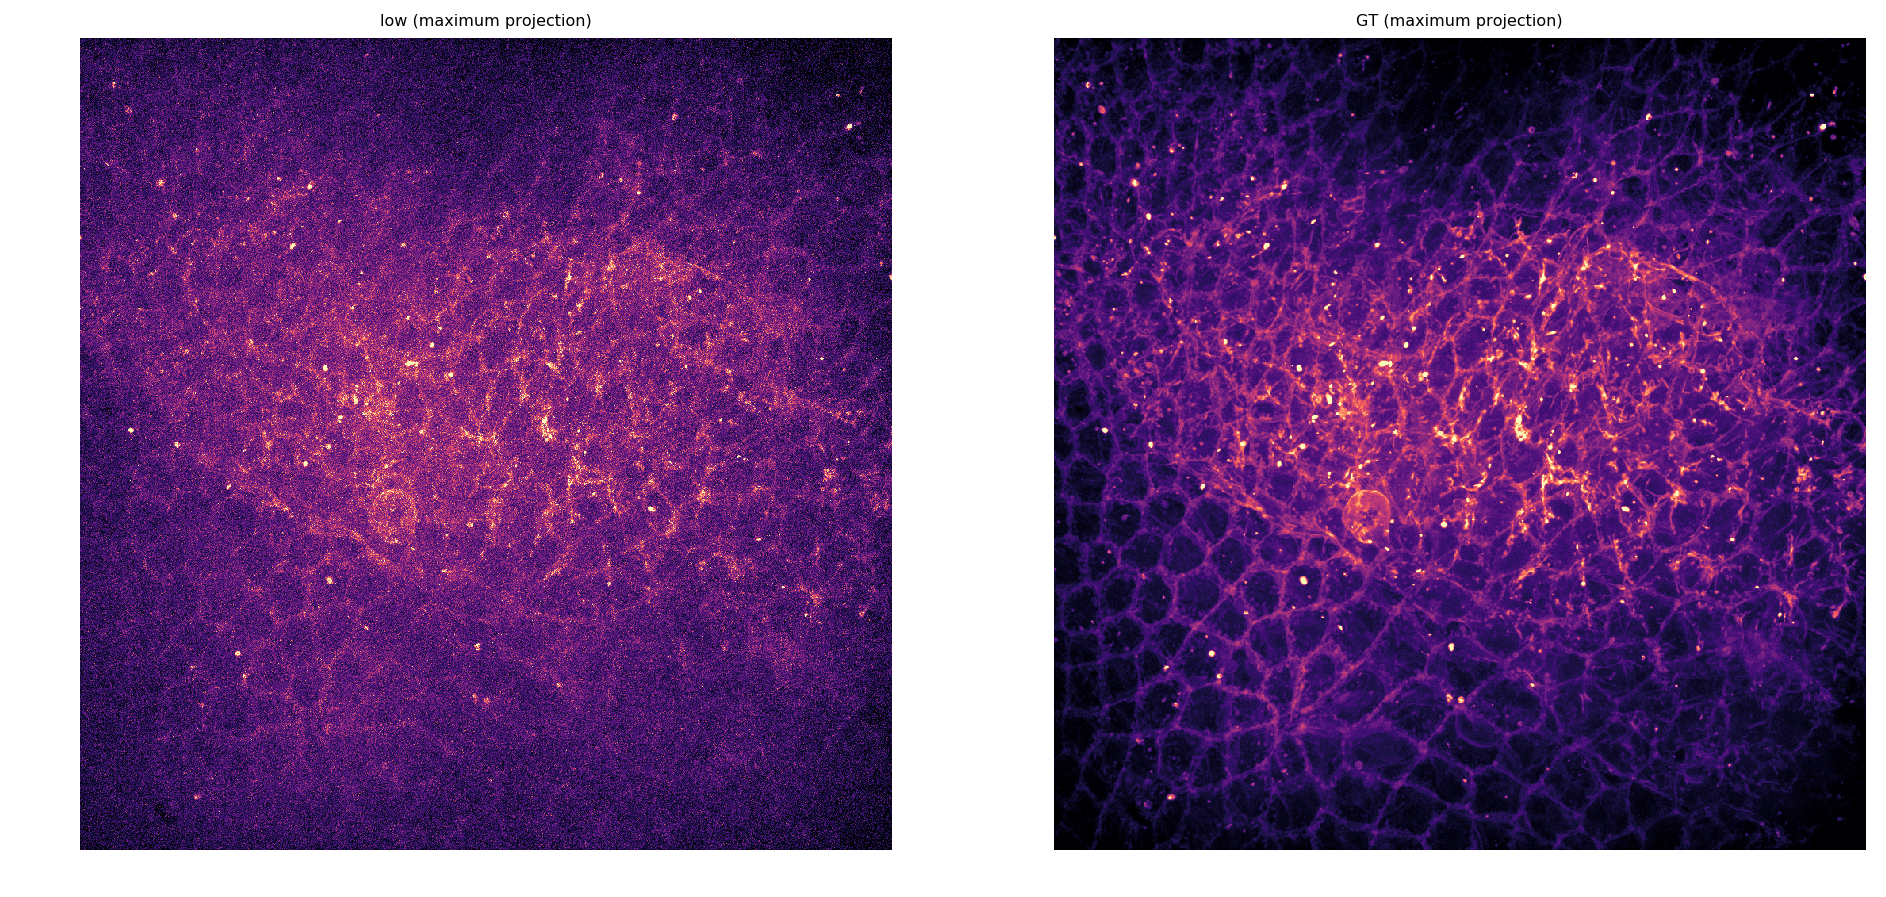

In [2]:
y = imread('/data/u934/service_imagerie/v_kapoor/CAREStephanTestData/GT/100x_bin2_05_1_w1CSU-TRIPLE-488_s12.tif')
x = imread('/data/u934/service_imagerie/v_kapoor/CAREStephanTestData/Low/100x_bin2_05_1_w1CSU-TRIPLE-488_s12.tif')

axes = 'ZYX'
print('image size =', x.shape)
print('image axes =', axes)

plt.figure(figsize=(16,10))
plot_some(np.stack([x,y]),
          title_list=[['low (maximum projection)','GT (maximum projection)']], 
          pmin=2,pmax=99.8);

<hr style="height:2px;">

# CARE model

Load trained model (located in base directory `models` with name `my_model`) from disk.  
The configuration was saved during training and is automatically loaded when `CARE` is initialized with `config=None`.

In [3]:
model = CARE(config=None, name='my_model', basedir='models')

Loading network weights from 'weights_best.h5'.


## Apply CARE network to raw image

Predict the restored image (image will be successively split into smaller tiles if there are memory issues).

In [4]:
%%time
restored = model.predict(x, axes)

Out of memory, retrying with n_tiles = 4
Out of memory, retrying with n_tiles = 8
CPU times: user 1min 3s, sys: 21 s, total: 1min 24s
Wall time: 1min 37s


Alternatively, one can directly set `n_tiles` to an appropriate value to avoid the time overhead from multiply retries in case of memory issues.

In [ ]:
%%time
restored = model.predict(x, axes, n_tiles=128)

Out of memory, retrying with n_tiles = 256
Out of memory, retrying with n_tiles = 512


/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflow/lib/python2.7/site-packages/csbdeep/internals/predict.py:114: UserWarning: invalid value (512) for 'n_tiles', changing to 256
  warnings.warn("invalid value (%d) for 'n_tiles', changing to %d" % (n_tiles,n_tiles_valid))


Out of memory, retrying with n_tiles = 1024


/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflow/lib/python2.7/site-packages/csbdeep/internals/predict.py:114: UserWarning: invalid value (1024) for 'n_tiles', changing to 256
  warnings.warn("invalid value (%d) for 'n_tiles', changing to %d" % (n_tiles,n_tiles_valid))


Out of memory, retrying with n_tiles = 2048


/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflow/lib/python2.7/site-packages/csbdeep/internals/predict.py:114: UserWarning: invalid value (2048) for 'n_tiles', changing to 256
  warnings.warn("invalid value (%d) for 'n_tiles', changing to %d" % (n_tiles,n_tiles_valid))


Out of memory, retrying with n_tiles = 4096


/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflow/lib/python2.7/site-packages/csbdeep/internals/predict.py:114: UserWarning: invalid value (4096) for 'n_tiles', changing to 256
  warnings.warn("invalid value (%d) for 'n_tiles', changing to %d" % (n_tiles,n_tiles_valid))


Out of memory, retrying with n_tiles = 8192


/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflow/lib/python2.7/site-packages/csbdeep/internals/predict.py:114: UserWarning: invalid value (8192) for 'n_tiles', changing to 256
  warnings.warn("invalid value (%d) for 'n_tiles', changing to %d" % (n_tiles,n_tiles_valid))


## Save restored image

Save the restored image stack as a ImageJ-compatible TIFF image, i.e. the image can be opened in ImageJ/Fiji with correct axes semantics.

In [12]:
Path('/data/u934/service_imagerie/v_kapoor/CAREStephanTestData/results').mkdir(exist_ok=True)
save_tiff_imagej_compatible('/data/u934/service_imagerie/v_kapoor/CAREStephanTestData/results/%s_100x_bin2_05_1_w1CSU-TRIPLE-488_s12.tif' % model.name, restored, axes)

<hr style="height:2px;">

# Raw low/high-SNR image and denoised image via CARE network

Plot the test stack pair and the predicted restored stack (middle).

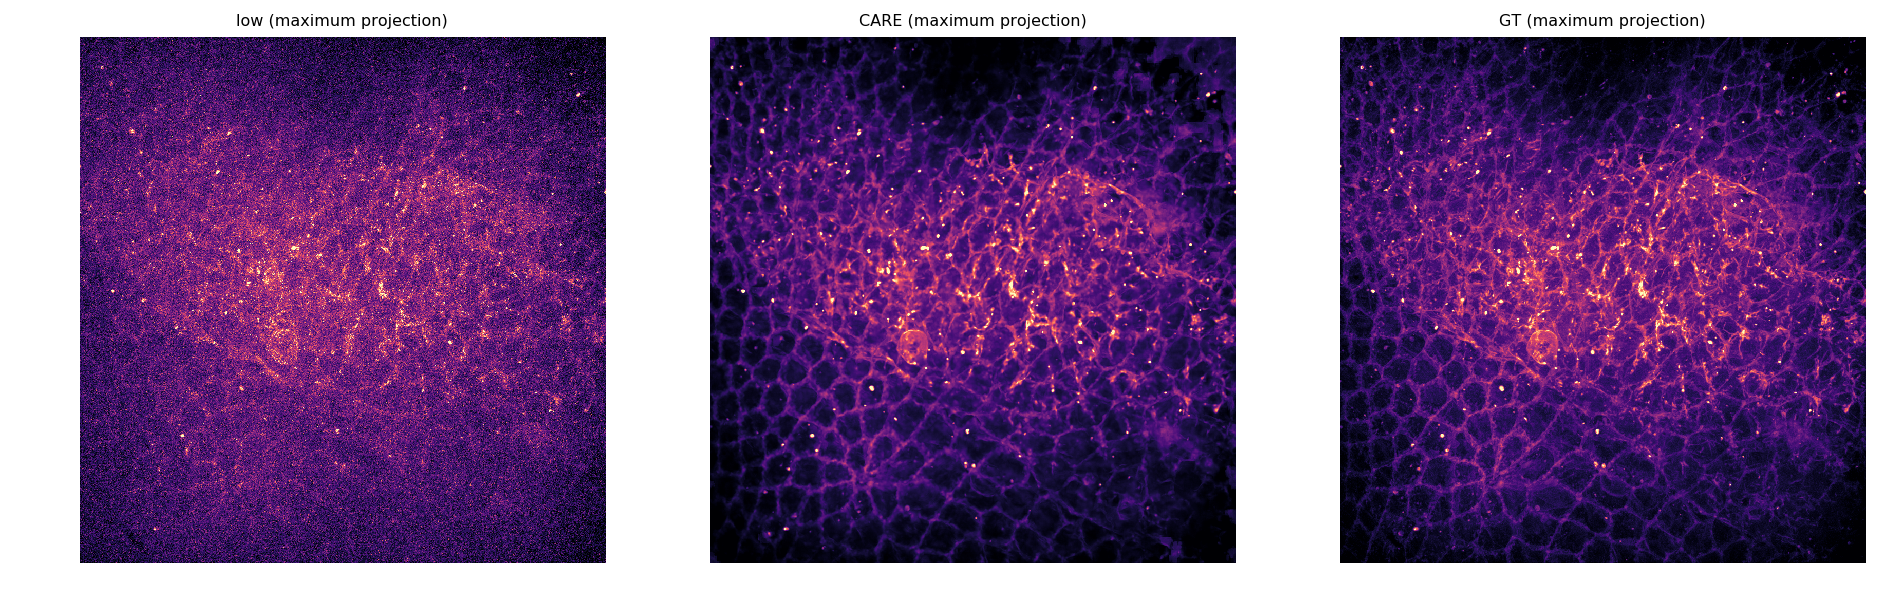

In [6]:
plt.figure(figsize=(16,10))
plot_some(np.stack([x,restored,y]),
          title_list=[['low (maximum projection)','CARE (maximum projection)','GT (maximum projection)']], 
          pmin=2,pmax=99.8);